In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import keras
from keras import regularizers
from glob import glob
from tensorflow.python.keras.layers import Input, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#vgg.summary()

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg16.output)
prediction = Dense(1, activation='sigmoid')(x)
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
#model.summary()

In [ ]:
for layer in model.layers:
    layer.kernel_regularizer = keras.regularizers.l1_l2(0.01)

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_path = '/content/drive/MyDrive/real vs fake/NEW_TRAIN_10K'
valid_path = '/content/drive/MyDrive/real vs fake/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   zoom_range=0.3,
                                   rotation_range=90,
                                   width_shift_range=0.3,
                                   #fill_mode='wrap',
                                   height_shift_range=0.3,
                                   #channel_shift_range=150.0,
                                   brightness_range=(0.1, 0.5),
                                   vertical_flip=True,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/real vs fake/NEW_TRAIN_10K',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 color_mode='rgb',
                                                 class_mode = 'binary')

Found 10000 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/real vs fake/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            color_mode='rgb',
                                            class_mode = 'binary')

Found 3000 images belonging to 2 classes.


In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=2
)

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[reduce_lr]
)

Epoch 1/20
313/313 [==============================] - 4437s 14s/step - loss: 0.3387 - accuracy: 0.8520 - val_loss: 0.5200 - val_accuracy: 0.7990
Epoch 2/20
313/313 [==============================] - 159s 507ms/step - loss: 0.2371 - accuracy: 0.9022 - val_loss: 0.7610 - val_accuracy: 0.7653
Epoch 3/20
313/313 [==============================] - 159s 507ms/step - loss: 0.2081 - accuracy: 0.9155 - val_loss: 0.3435 - val_accuracy: 0.8773
Epoch 4/20
313/313 [==============================] - 159s 507ms/step - loss: 0.1840 - accuracy: 0.9263 - val_loss: 0.5516 - val_accuracy: 0.8267
Epoch 5/20
313/313 [==============================] - 163s 519ms/step - loss: 0.1714 - accuracy: 0.9329 - val_loss: 0.4280 - val_accuracy: 0.8723
Epoch 6/20
313/313 [==============================] - 159s 508ms/step - loss: 0.1650 - accuracy: 0.9333 - val_loss: 1.0088 - val_accuracy: 0.7377
Epoch 7/20
313/313 [==============================] - 161s 515ms/step - loss: 0.1571 - accuracy: 0.9338 - val_loss: 0.5336 - 

In [ ]:
import matplotlib.pyplot as plt

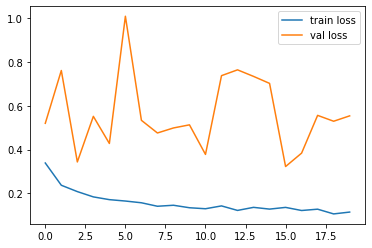

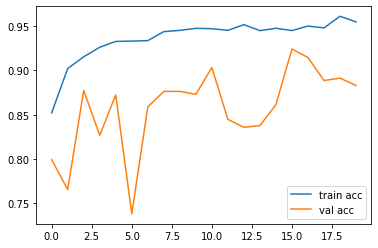

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')